## This Notebook is Jusst with the separation of Train Data and The Test Data

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [68]:
# Generate random data for dogs and cats
np.random.seed(0) # For reproducibility

In [69]:
# Dogs: Higher ear flapiness and lower whisker length
dogs_whisker_length = np.random.normal(loc= 5, scale=1, size=1000)
dogs_ear_flapiness_index = np.random.normal(loc=8, scale=1, size=1000)


In [70]:
# Cats: Lower ear flapiness and higher whisker length
cats_whisker_length = np.random.normal(loc= 8, scale=1, size=1000)
cats_ear_flapiness_index = np.random.normal(loc=5, scale=1, size=1000)

In [71]:
#Combine the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flapiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flapiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [72]:
labels

array([0., 0., 0., ..., 1., 1., 1.], shape=(2000,))

## Now we will devide the data into Training data and Text data

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [74]:
X_test

array([[ 8.09541188,  5.19978462],
       [ 4.31055082, 10.29046707],
       [ 6.78131617,  5.26767089],
       [ 6.8227236 ,  8.51271752],
       [ 7.79416597,  5.1592342 ],
       [ 8.92443402,  4.60043114],
       [ 4.20771334,  8.85910419],
       [ 8.2598325 ,  4.95038934],
       [ 4.59821906,  8.38141625],
       [ 8.50829919,  5.98284122],
       [ 5.06651722,  6.65158691],
       [ 8.34242735,  5.41227227],
       [ 7.34834379,  8.80166021],
       [ 4.44569037,  7.03191788],
       [ 5.04949498,  7.48907382],
       [ 4.60904662,  8.54748057],
       [ 5.01034931,  5.87882356],
       [ 5.67229476,  7.71099479],
       [ 9.060715  ,  5.29740566],
       [ 7.82639176,  5.87373105],
       [ 5.21950956,  8.38432341],
       [ 7.87141245,  4.69083149],
       [ 8.8528891 ,  6.54093298],
       [ 6.97270312,  3.48980036],
       [ 7.90873298,  3.06297859],
       [ 5.40198936,  8.66325809],
       [ 9.13181196,  4.31155386],
       [ 4.50389767,  9.11728347],
       [ 4.10259907,

In [75]:
X_train

array([[ 5.69042902,  8.03054658],
       [ 4.36256297, 10.32079984],
       [ 5.02295976,  7.1961496 ],
       ...,
       [ 6.15418403,  7.2591333 ],
       [ 8.10086706,  6.9783727 ],
       [ 7.79909247,  4.21650074]], shape=(1600, 2))

In [76]:
y_train

array([0., 0., 0., ..., 0., 1., 1.], shape=(1600,))

In [77]:
y_test

array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1.

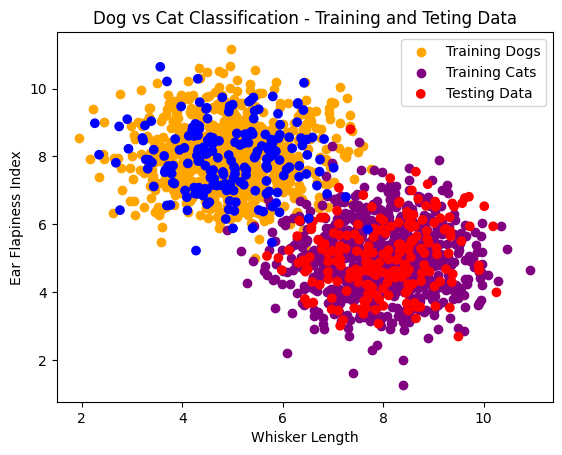

In [78]:
# Now we will use matplotlib to visualize the data
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='orange', label='Training Dogs')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='purple', label='Training Cats')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap = 'bwr' , label = 'Testing Data')
plt.title('Dog vs Cat Classification - Training and Teting Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.legend()
plt.show()

In [79]:
# Implimenting random linear classifier algorithm
def random_linear_classifier( dogs_data, cats_data, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        error = compute_error(theta, theta0, dogs_data, cats_data)
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0, best_error
def compute_error(theta, theta0, dogs_data, cats_data):
    erorr = 0
    for x_dog in dogs_data:
        if np.dot(theta, x_dog) + theta0 <= 0:
            erorr += 1
    for x_cat in cats_data:
        if np.dot(theta, x_cat) + theta0 >= 0:
            erorr += 1
    return erorr

In [80]:
### Define function for k-fold cross-validation
def cross_validation(dogs_data, cats_data, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []
    for k in k_values:
        errors = []
        for train_index, val_index in kf.split(dogs_data):
            X_train_fold = np.vstack((dogs_data[train_index], cats_data[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((dogs_data[val_index], cats_data[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold==0], X_train_fold[y_train_fold==1], k, d)
            errors.append(compute_error(best_theta_fold,best_theta0_fold, X_val_fold[y_val_fold==0], X_val_fold[y_val_fold==1]))
        avg_errors.append(np.mean(errors))
    best_k = k_values[np.argmin(avg_errors)]
    return best_k, avg_errors

# Define the range of k values to test
k_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,10000]
best_k, avg_errors = cross_validation(dogs_data, cats_data, k_values, d=2)

print(f"Best k value: {best_k}")

Best k value: 300


In [81]:
# Run random linear classifier alogorithm on the training data
k = best_k
d = 2
best_theta_train, best_theta0_train, best_error_train = random_linear_classifier(X_train[y_train==0], X_train[y_train==1], k, d)

In [82]:
# Plot the decision boundary on training data
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = -(best_theta_train[0]/ best_theta_train[1]) * x_vals_train - best_theta0_train / best_theta_train[1]

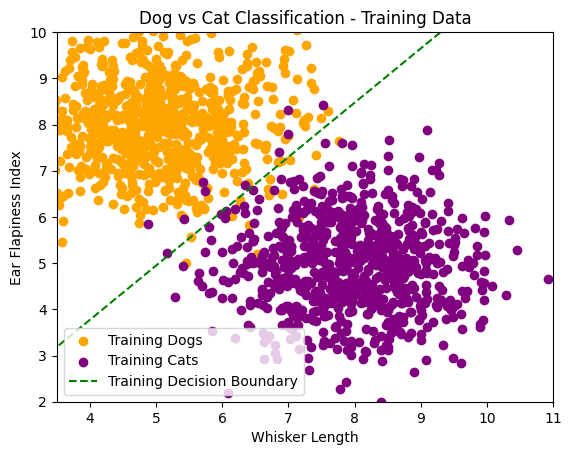

In [83]:
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='orange', label='Training Dogs')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='purple', label='Training Cats')
plt.plot(x_vals_train, y_vals_train, color='green', label='Training Decision Boundary', linestyle='--')
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.title('Dog vs Cat Classification - Training Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.legend()
plt.show()

In [85]:
print("Training Error: ", best_error_train)

Training Error:  27


In [86]:
# Compute the error on the test data
test_error = compute_error(best_theta_train, best_theta0_train, X_test[y_test==0], X_test[y_test==1])

print("Test Error: ", test_error)

Test Error:  6


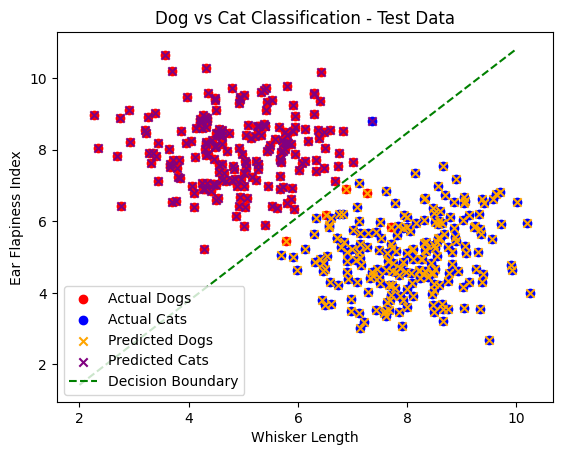

In [87]:
# Plot the actual text data and predicted test data
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='red', label='Actual Dogs')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='blue', label='Actual Cats')

# Predict the test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0
# Plot predicted test data points
plt.scatter(X_test[predicted_labels==0][:, 0], X_test[predicted_labels==0][:, 1], color='orange', marker='x', label='Predicted Dogs')
plt.scatter(X_test[predicted_labels==1][:, 0], X_test[predicted_labels==1][:, 1], color='purple', marker='x', label='Predicted Cats')

# Plot the decission boundary
plt.plot(x_vals_train, y_vals_train, color='green', label='Decision Boundary', linestyle='--')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.title('Dog vs Cat Classification - Test Data')
plt.legend()
plt.show()
